In [1]:
#---- Load the required libraries
import numpy as np # For data analysis
import pandas as pd # For data wrangling and analysis. 
import re  # For string manipulations
import matplotlib.pyplot as plt # For visualization

In [2]:
#---- Preapre the data set

#----- Method 1
def get_data( url ):
    df = pd.read_html(url)[1]
    return df

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_national_independence_days"

df = get_data(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Country                       216 non-null    object
 1   Name of holiday               177 non-null    object
 2   Date of holiday               189 non-null    object
 3   Year of event                 189 non-null    object
 4   Independence from             181 non-null    object
 5   Event commemorated and notes  146 non-null    object
dtypes: object(6)
memory usage: 10.2+ KB


In [4]:
# Wikipedia has citations inside the square brackets. Remove the citations brakets.
def remove_citation_bracket_and_nan( pdSeries ):
    
    #----- Drop rows that contain NaN -> replace [nn] with "".
    out = pdSeries.dropna().str.replace("(\[\d\d\])", "", regex=True)  # Search patten []
    
    return out

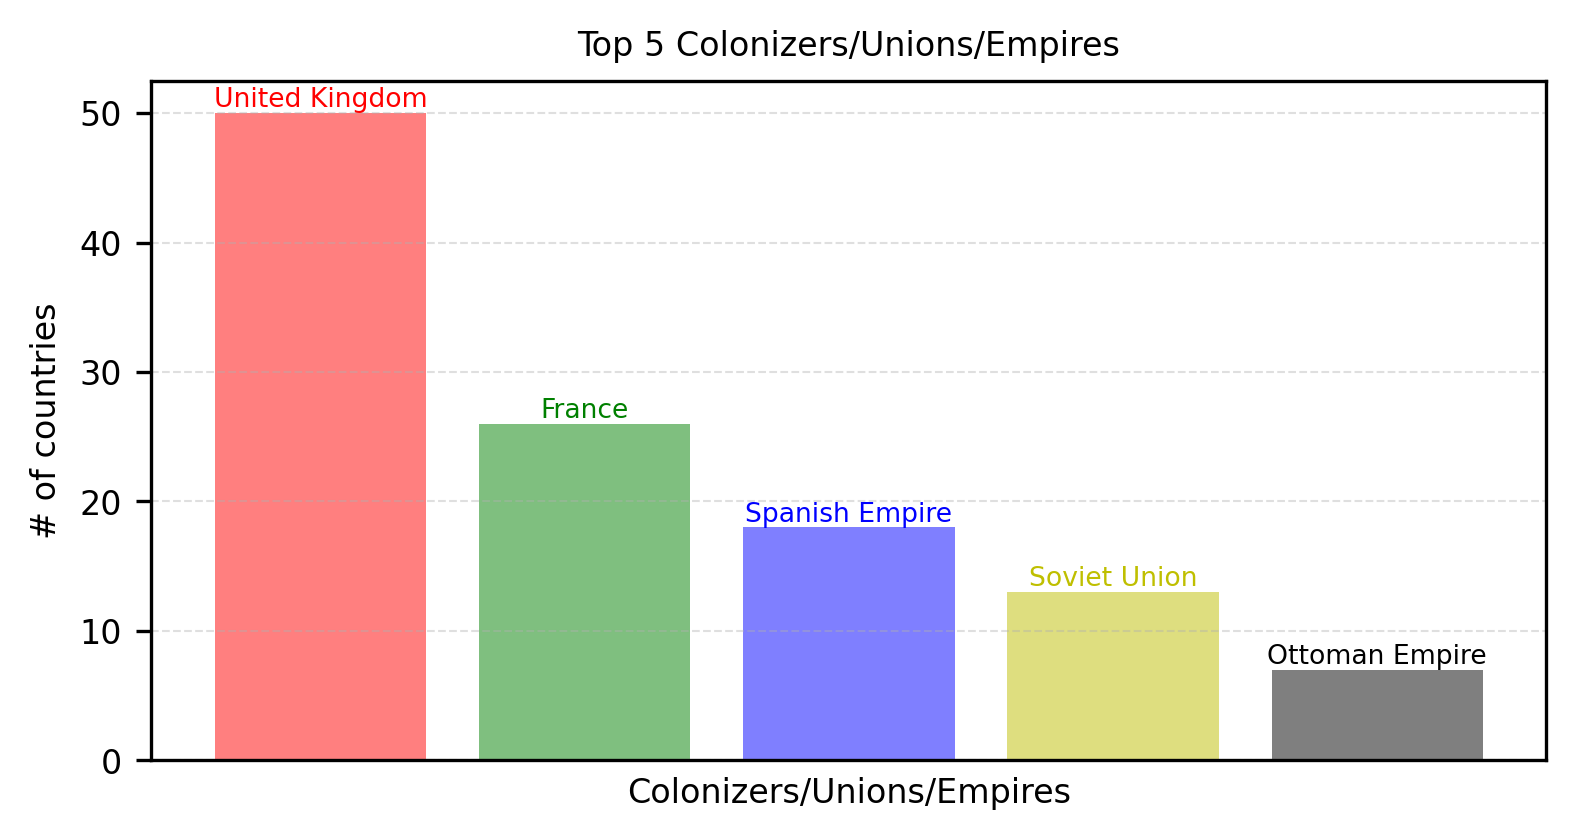

In [5]:
#---- Top 
def plot_freq():
    ps = remove_citation_bracket_and_nan( df['Independence from'] )

    x = ps.value_counts().head(5).index
    y = ps.value_counts().head(5).values

    fig, ax = plt.subplots(1,1, figsize = (6,3), dpi=300)
    fontl=8

    colorList = ['r', 'g', 'b', 'y', 'k']
    ax.bar(x, y, color=colorList, alpha=0.5)

    ax.set_xticks([])
    ax.set_ylabel("# of countries", fontsize=fontl)
    ax.set_xlabel("Colonizers/Unions/Empires", fontsize=fontl)
    # Ticks font size
    ax.tick_params( labelsize=1.0*fontl)
    ax.set_title("Top 5 Colonizers/Unions/Empires", fontsize=fontl)
    ax.grid(True, axis='y',linestyle='--', linewidth=0.5, alpha=0.4 )

    for i in range(len(x)):
        ax.annotate( str(x[i]), xy=(x[i], y[i]), ha='center', va='bottom', fontsize=8, color=colorList[i], size=0.8*fontl)

    fig.savefig("first.jpg", bbox_inches='tight')
    
plot_freq()

In [6]:
def get_event_year_list( pdSeries ):
    ylist = pdSeries.str.findall("[\d]{4}").values # All years from the list because some countries were freed in multiple years

    aList = [i for j in ylist for i in j] # Unpack the list and make a single column
    aList = np.asarray( aList, dtype=np.int) # Change the datatype to int
    aList = np.sort(aList) # Sort the list
    
    return aList


United Kingdom
France
Spanish Empire
Soviet Union
Ottoman Empire


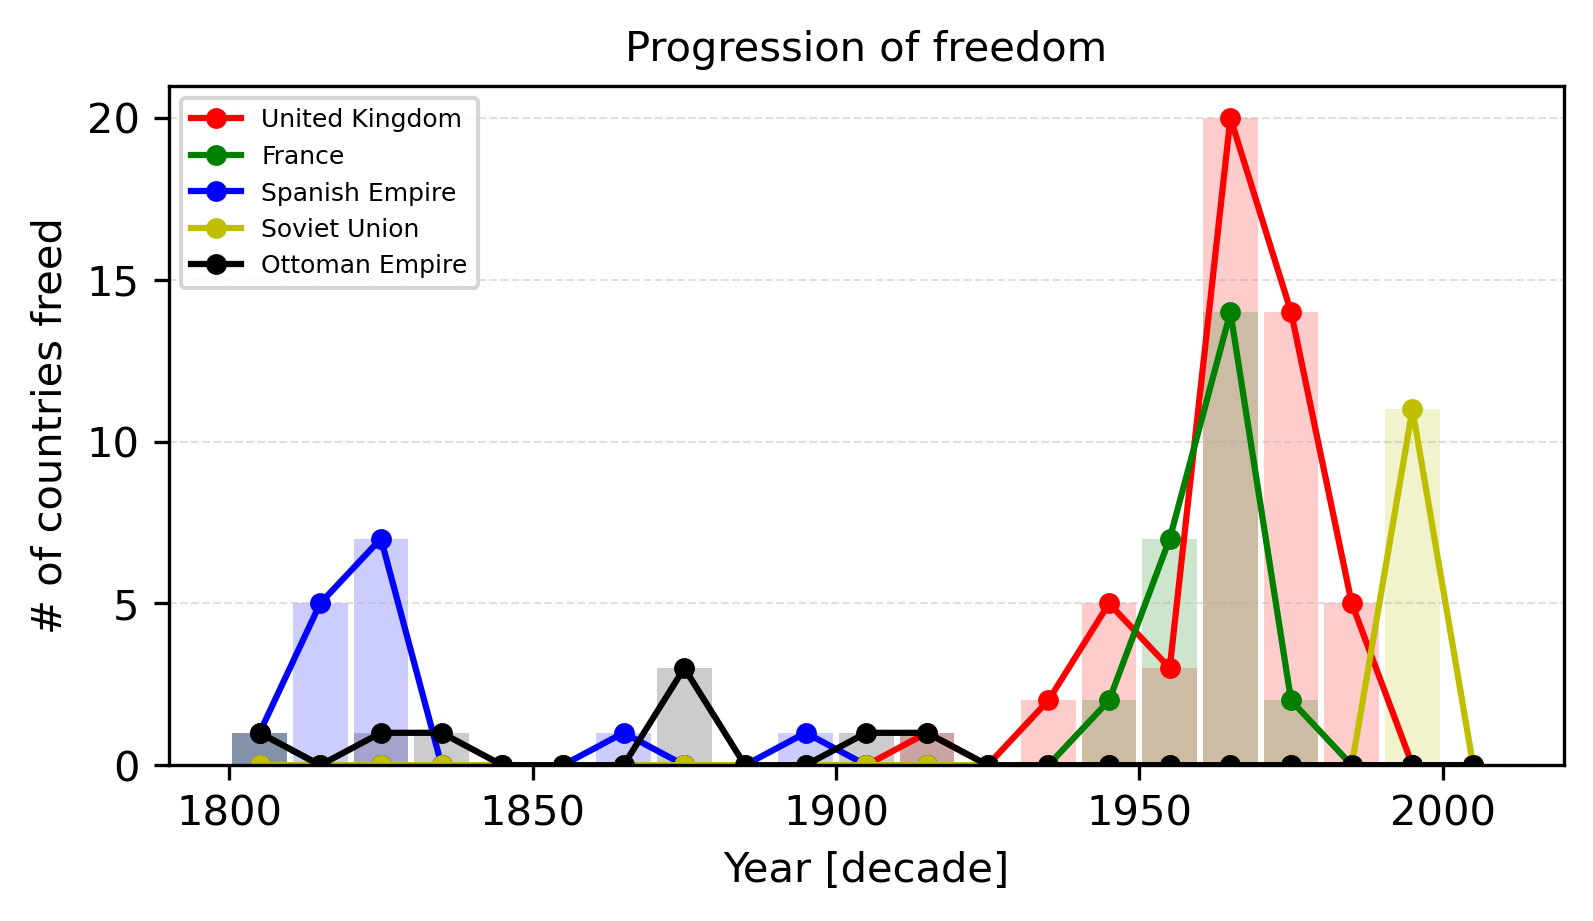

In [7]:
def plot_histogram_events_year(df, country_list):
    fig, ax = plt.subplots(1,1, figsize = (6,3), dpi=300)
    fontl=10
    marksize = 4
    colorList = ['r', 'g', 'b', 'y', 'k']
    markerList = ['o', 'o', 'o', 'o','o']

    # Create bins with spacing of 10 years apart.
    yearStart = 1800
    yearEnd = 2020
    dYear = 10
    xbins = [yearStart + dYear*i for i in range( int((yearEnd-yearStart)/dYear) )]

    for i,country in enumerate(country_list):
        print(country)
        df_country = df[ df['Independence from'] == country ]
                            
        ps = remove_citation_bracket_and_nan( df_country['Year of event'])
        y = get_event_year_list(ps)
        freq, year, temp = ax.hist(y, bins=xbins,histtype='bar', align='mid', rwidth=0.9, color=colorList[i], alpha=0.2)
        ax.plot(year[:-1]+dYear/2,freq, marker=markerList[i], color=colorList[i], markersize=marksize, label=country)
     
#     # For all countries
#     ps = remove_citation_bracket_and_nan( df['Year of event'])
#     y = get_event_year_list(ps)
#     freq, year, temp = ax.hist(y, bins=xbins,histtype='bar', align='mid', rwidth=0.9, color=colorList[i], alpha=0.2)
#     ax.plot(year[:-1]+dYear/2,freq, marker=markerList[i], color=colorList[i], markersize=marksize, label=country)

    ax.set_ylabel("# of countries freed")
    ax.set_xlabel("Year [decade]")
    ax.legend(loc='upper left', fontsize=0.6*fontl, frameon=True)
#     ax.set_title("Distribution of the year of independence", fontsize=fontl)
    ax.set_title("Progression of freedom", fontsize=fontl)
    ax.grid(True, axis='y',linestyle='--', linewidth=0.5, alpha=0.4 )
    fig.savefig("second.jpg", bbox_inches='tight')

    
country_list = remove_citation_bracket_and_nan( df['Independence from'] ).value_counts().head(5).index
plot_histogram_events_year(df, country_list)       